In [24]:
import numpy as np
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_to_folder = '/content/drive/My Drive/Rango/data/'
image1 = Image.open( path_to_folder + 'img1.jpg')
image2 = Image.open( path_to_folder + 'img2.png')

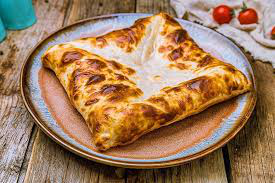

In [4]:
image1

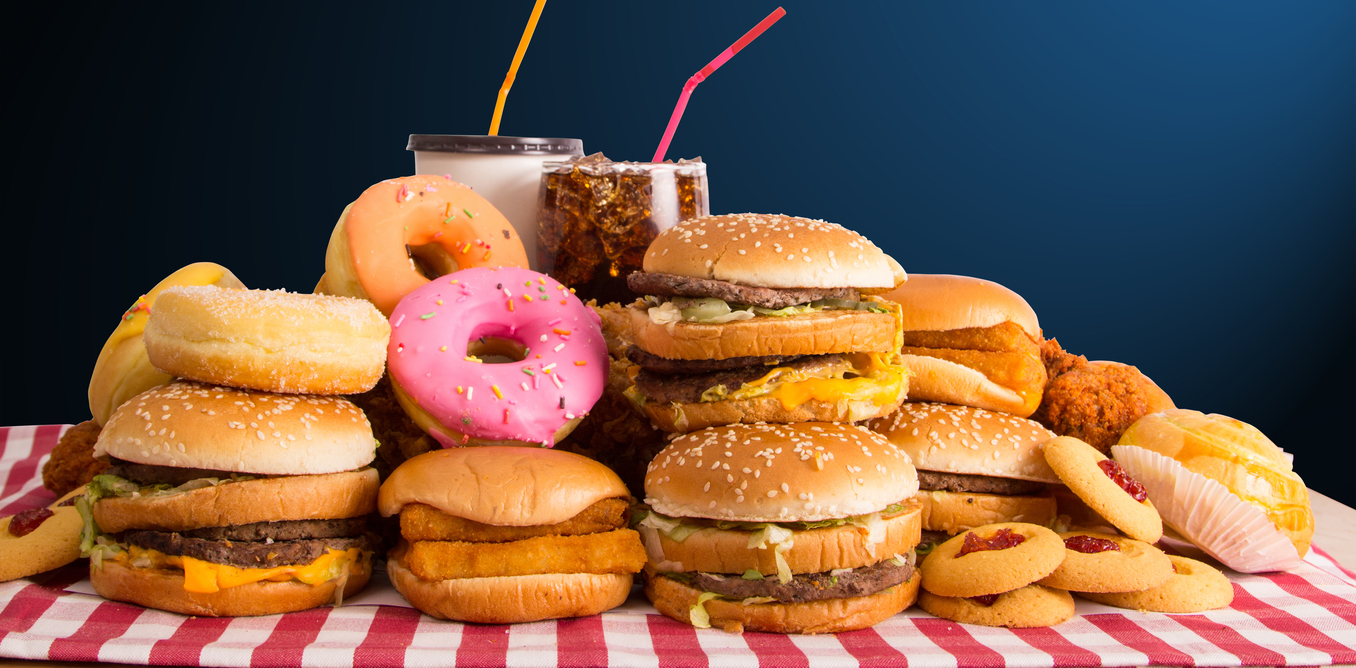

In [5]:
image2

In [6]:
print(image1.format)
print(image2.format)

PNG
PNG


Sizes of images:

In [7]:
print(image1.size)
print(image2.size)

(275, 183)
(1356, 668)


Paths to images:

In [8]:
print(image1.filename)
print(image2.filename)

/content/drive/My Drive/Rango/data/img1.jpg
/content/drive/My Drive/Rango/data/img2.png


Image Height/Width:

In [9]:
print(image1.height, image1.width)
print(image2.height, image2.width)

183 275
668 1356


Color formats:

In [10]:
print(image1.mode)
print(image2.mode)

RGB
RGB


Resize first image to (1000, 1000) and second image to (200, 300):

In [11]:
res1 = image1.resize((1000, 1000))
res2 = image2.resize((200, 300))

In [12]:
print(res1.size)
print(res2.size)

(1000, 1000)
(200, 300)


Change sizes of images but keep proportions:

In [13]:
img1_copy = image1.copy()
scale = max(1000/img1_copy.width, 1000/img1_copy.height)
img1_copy = img1_copy.resize((int(img1_copy.width*scale), int(img1_copy.height*scale )))
img1_copy.thumbnail((1000,1000 ))
img1_copy.size

(1000, 666)

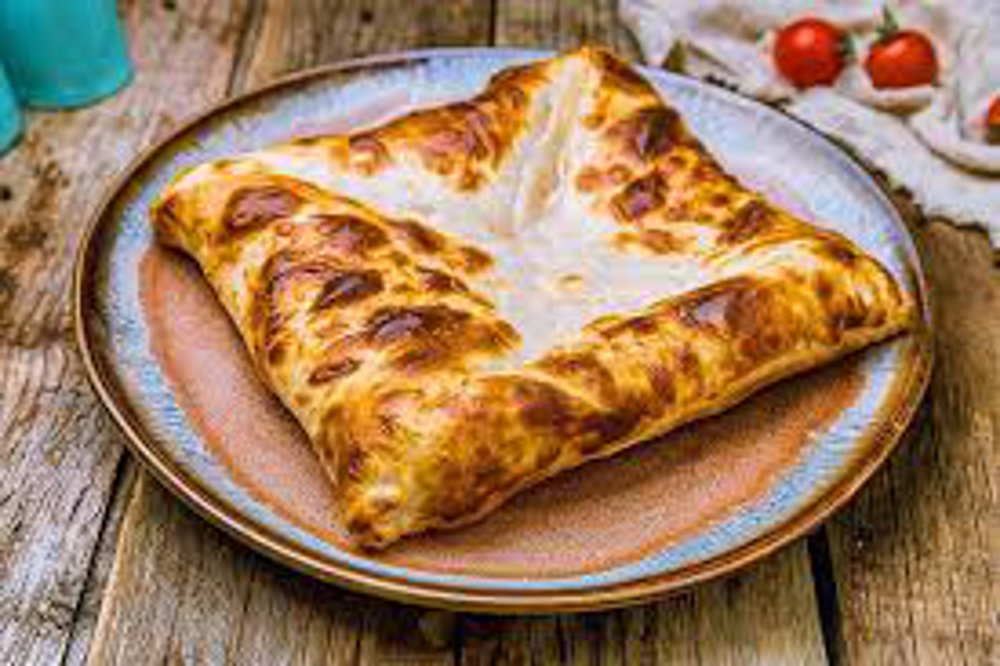

In [14]:
img1_copy

In [15]:
img2_copy = image2.copy()
img2_copy.thumbnail((200,200 ))
img2_copy.size

(200, 99)

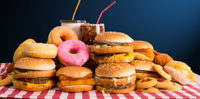

In [16]:
img2_copy

Insert second image into first image with coordinates for upper left corner `(100, 200)`:

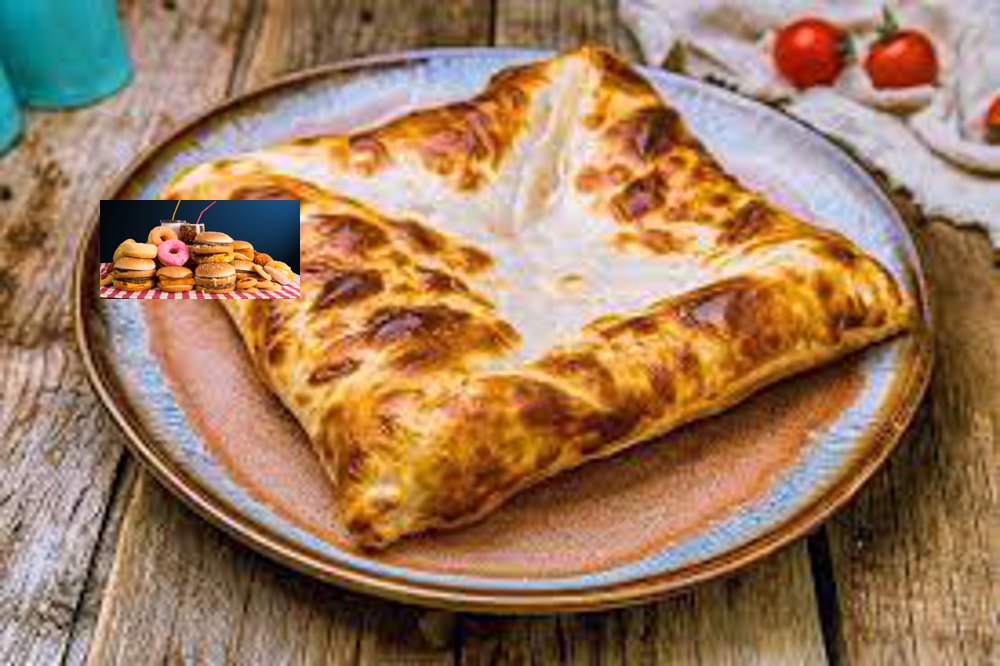

In [17]:
img1_copy.paste(img2_copy, (100, 200))
img1_copy

Crop central part with size `(200, 300)` from first image:

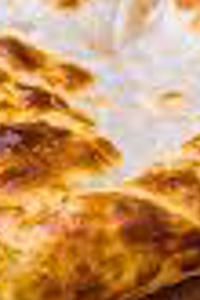

In [18]:
left = (img1_copy.width - 200)/2
right = (img1_copy.width + 200)/2
top = (img1_copy.height - 300)/2
bottom = (img1_copy.height + 300)/2

cropped = img1_copy.crop((left, top, right, bottom))
cropped

Rotations:

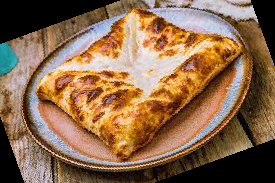

In [19]:
image1.rotate(20)

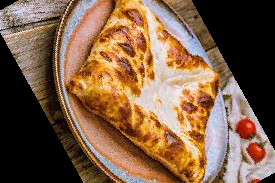

In [20]:
import random
image1.rotate(random.randint(0,360))

Rotate with random angle and expand it so that we should see full image:

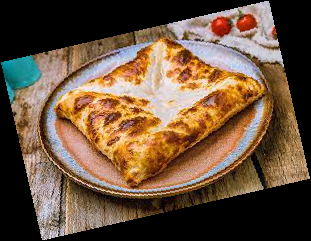

In [21]:
import random
image1.rotate(random.randint(0,360), expand=True)

Transpose:

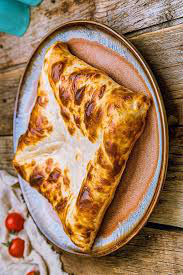

In [22]:
image1.transpose(Image.TRANSPOSE)

Affine transforms:

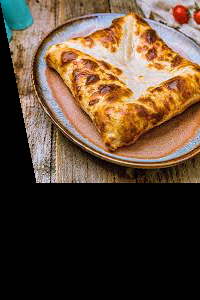

In [25]:
transform = np.array([[0.8, 0.2, 0], [0, 1, 0], [0, 0, 1]])  
transform_inv = np.linalg.inv(transform)                     
data = np.append(transform_inv[0], transform_inv[1])         
image1.transform(cropped.size, method=Image.AFFINE, data=data)

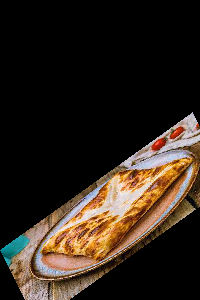

In [26]:
transform = np.array([[0.7, 0.2, 0], [-0.5, 0.4, 250], [0, 0, 1]]) 
transform_inv = np.linalg.inv(transform)                     
data = np.append(transform_inv[0], transform_inv[1])         
image1.transform(cropped.size, method=Image.AFFINE, data=data)

Convert second image to grayscale with 1bit pixels and RGBA format.

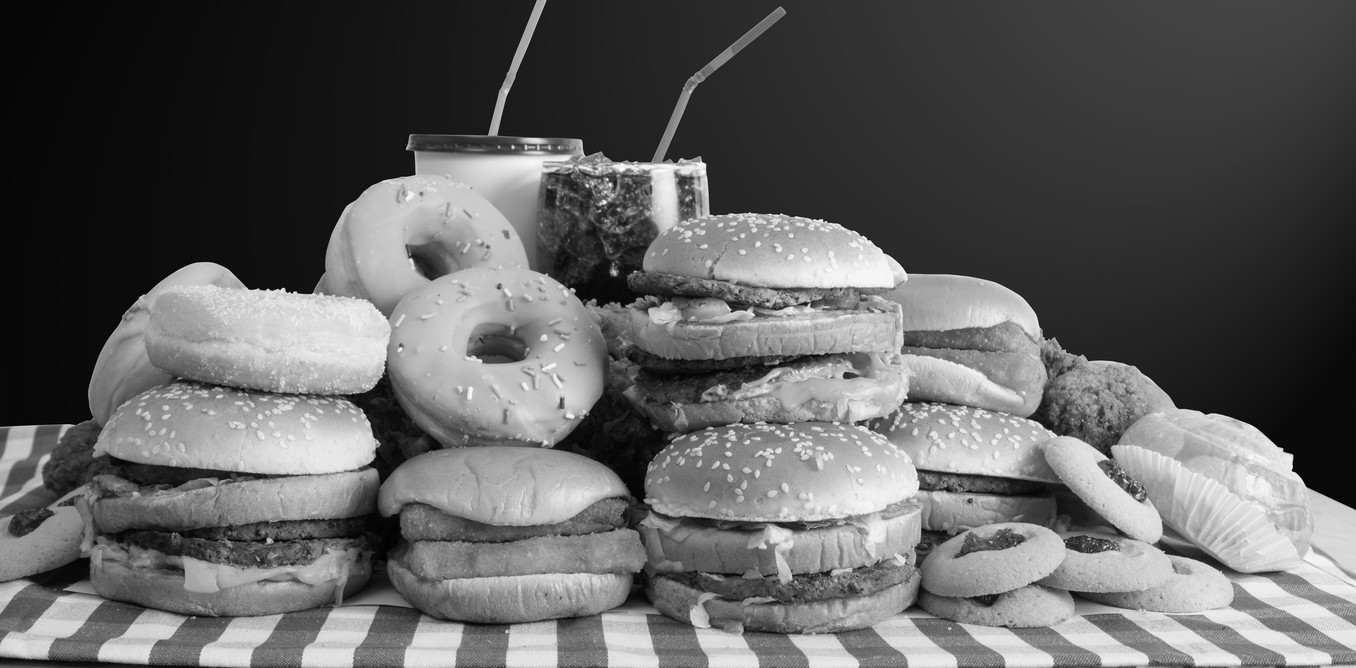

In [27]:
image2.convert('L')

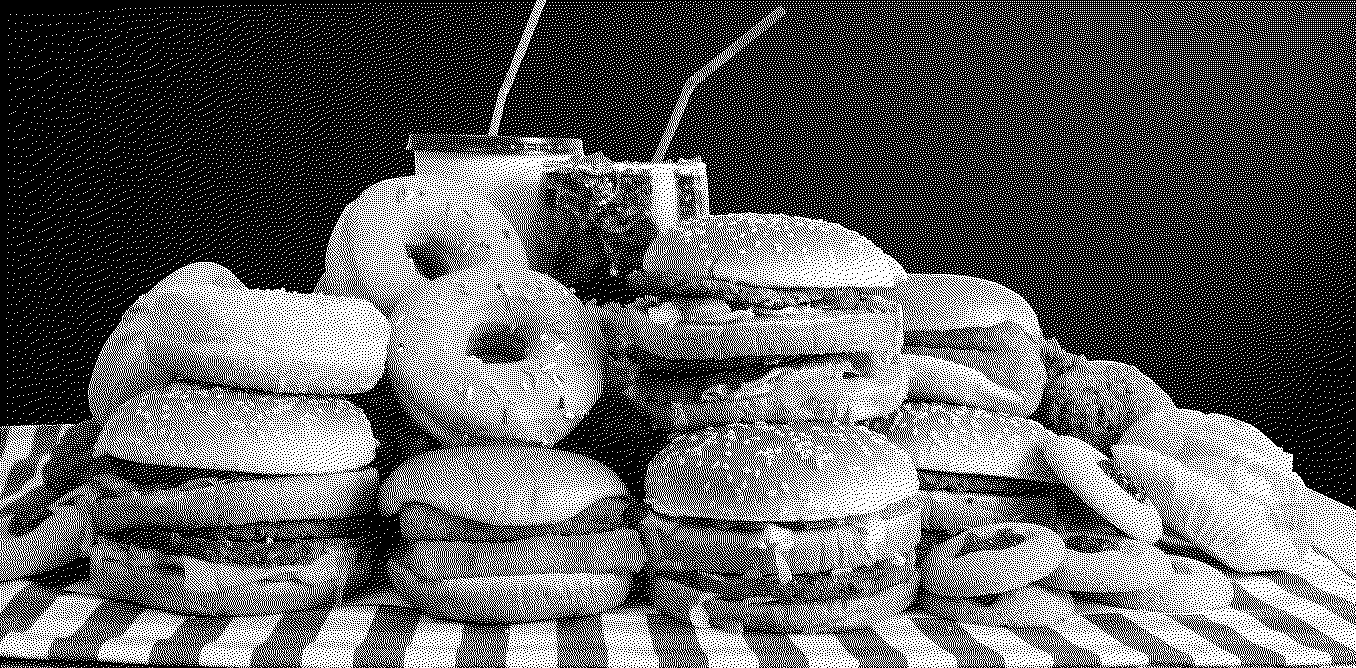

In [28]:
image2.convert('1')

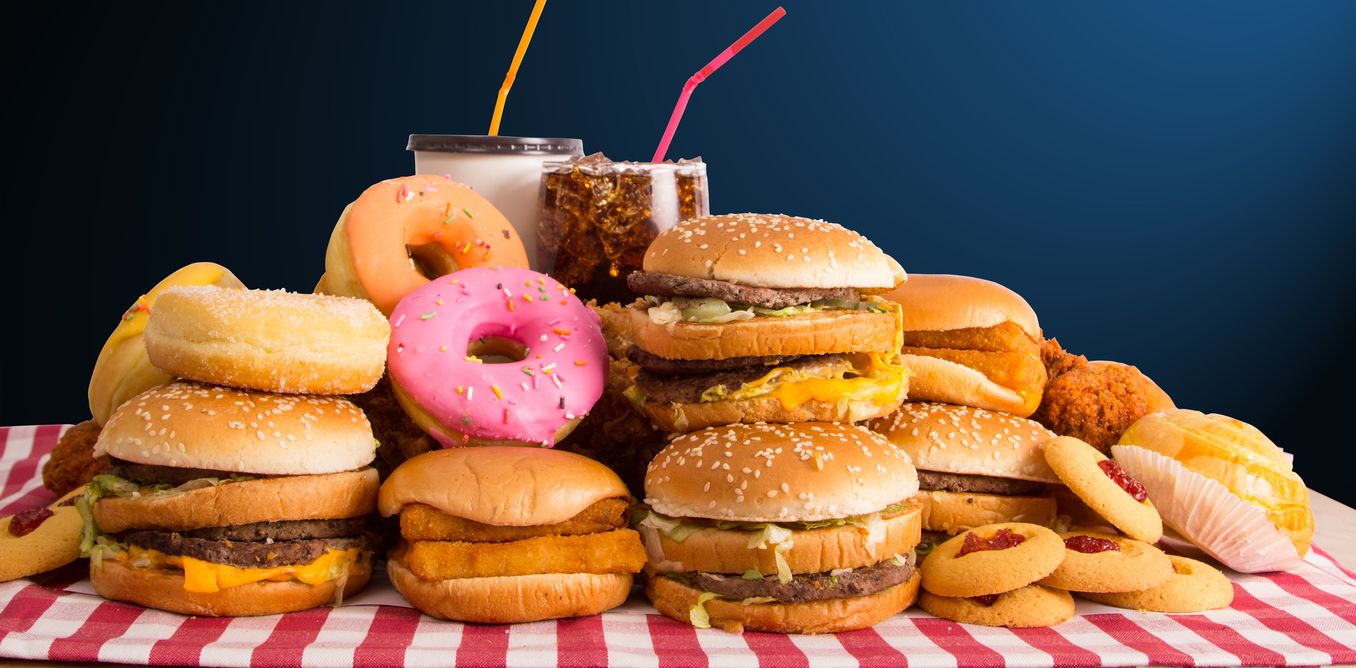

In [29]:
image2.convert('RGBA')

Normalization:

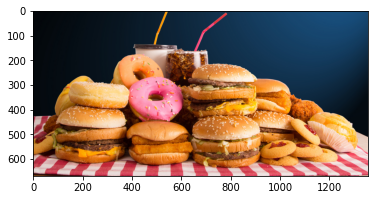

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

img2_arr = np.asarray(image2, dtype='float32')   
img2_arr /= 255.0  

plt.imshow(img2_arr)
plt.show()

Standartization:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


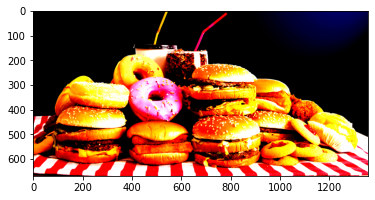

In [31]:
img2_arr = np.asarray(image2, dtype='float32')    
img2_arr = (img2_arr-img2_arr.mean())/img2_arr.std()   

plt.imshow(img2_arr)
plt.show()